In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import torch
import torch.nn as nn
from learning_dynamics.data_modules import ShallowWaterDataModule
from learning_dynamics.models import ShallowWaterVAEModel, Encoder, Decoder
from learning_dynamics.callbacks import ShallowWaterPEGPVAEPlotting
import wandb
import lightning as L
torch.set_default_dtype(torch.float64)

In [3]:
# run = wandb.init(project="PEGP-VAE", name=f"Physics_0_{int(time.time())}")
wandb_logger = None #WandbLogger()

In [4]:
train_data_path = '../data/PDEs/Shallow_Water/shallow_water_data.pkl'

In [5]:
data_module = ShallowWaterDataModule(train_data_path=train_data_path)
data_module.setup("fit")

In [6]:
# params
width = 128
height = 128
embed_dim = 512
latent_dim = 1
dt = 0.1
val_check = 50
batch_size = 32
max_epochs = 6000
beta_annealing_epochs = 50

In [7]:
encoder = Encoder(width, height, embed_dim, latent_dim)
decoder = Decoder(width, height, embed_dim, latent_dim)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2025-04-23 21:36:15.023732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745458575.034617  645401 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745458575.038161  645401 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin c

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/kendra/miniconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Frequency None 
Damping None


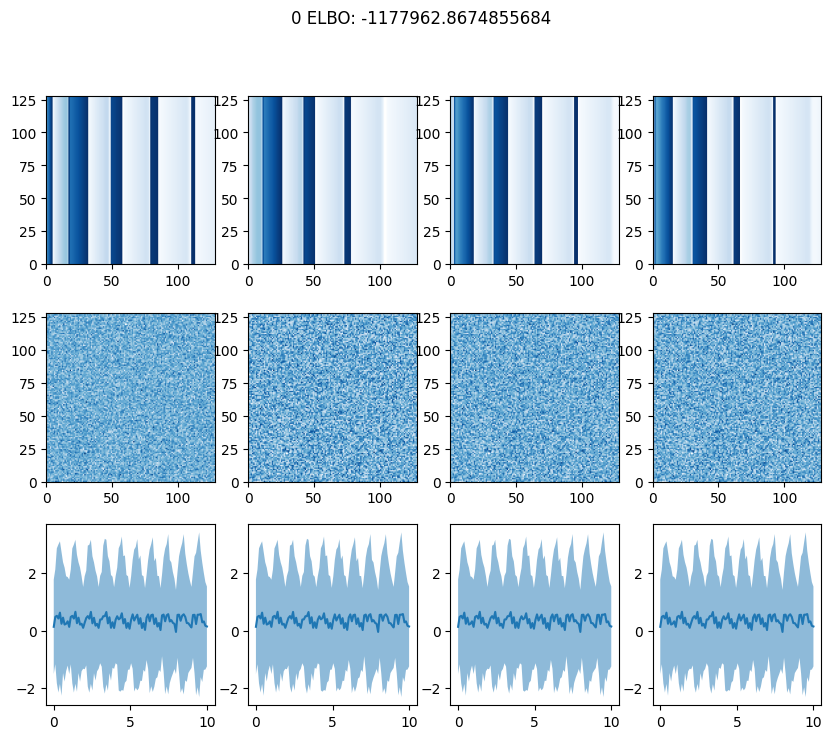

Frequency None 
Damping None


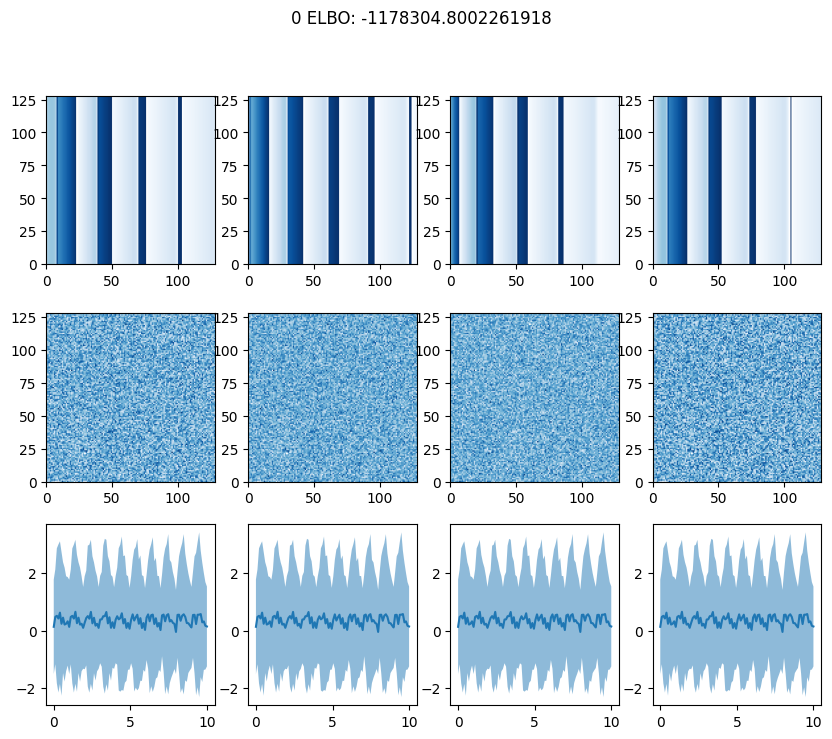

/home/kendra/miniconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/home/kendra/miniconda3/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


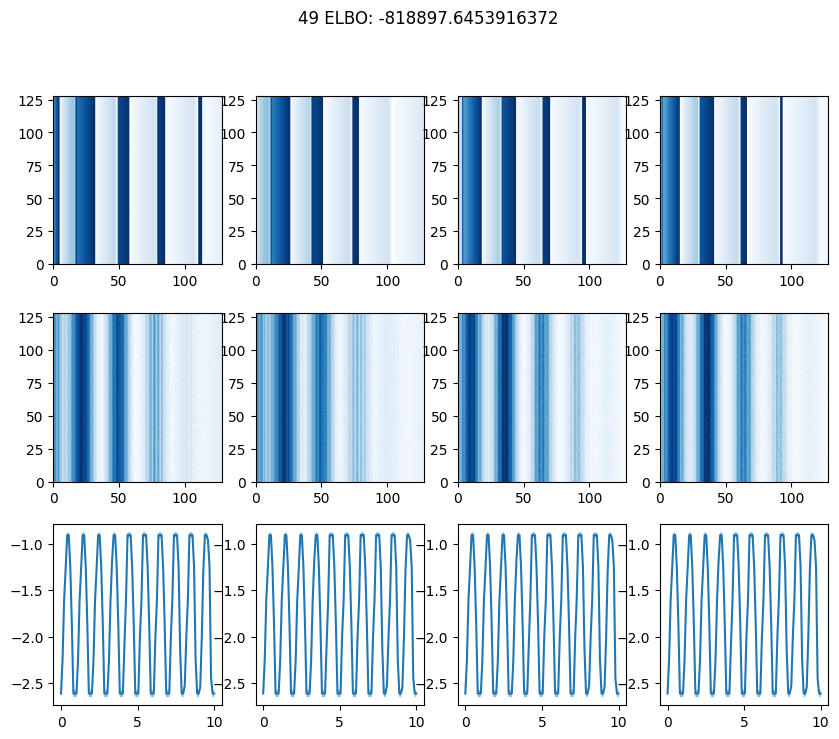

Frequency None 
Damping None


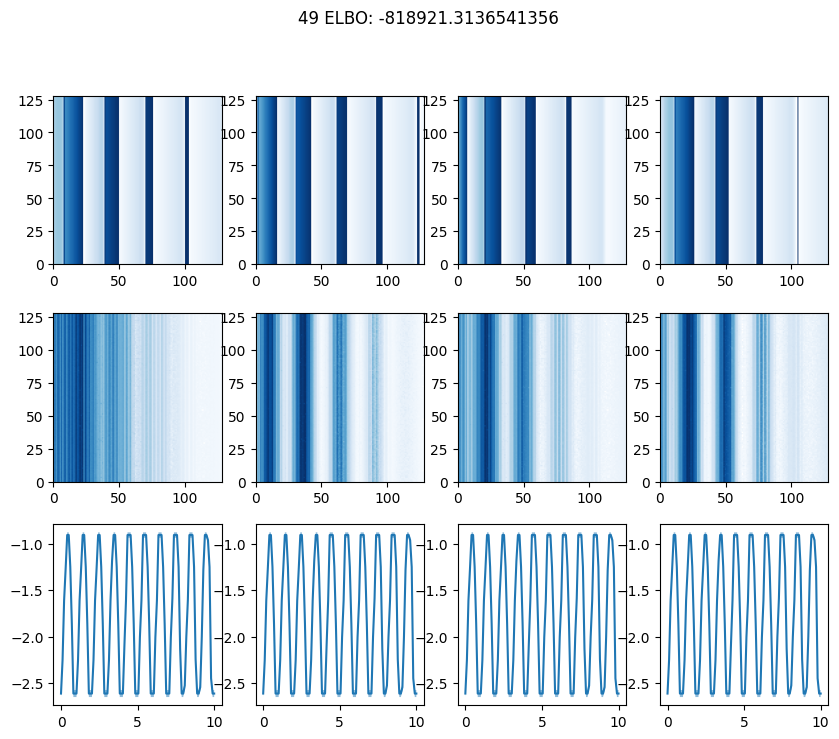

Frequency None 
Damping None


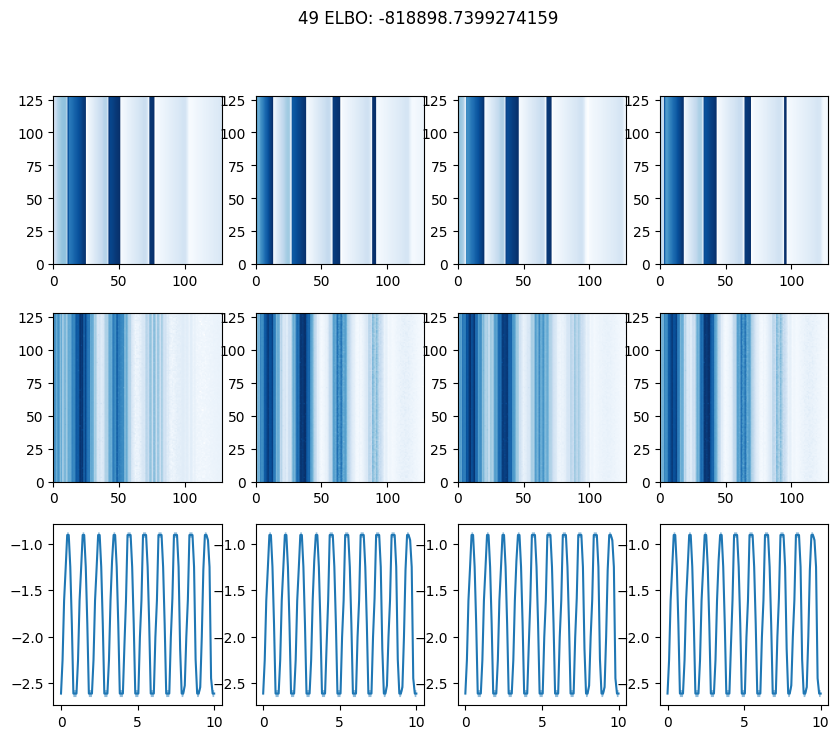

Frequency None 
Damping None


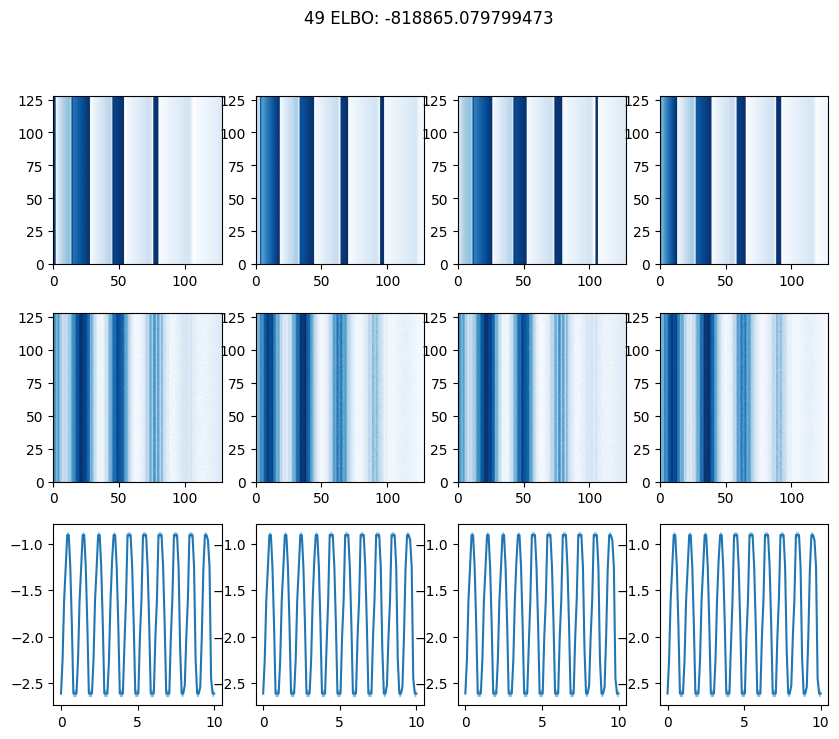

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


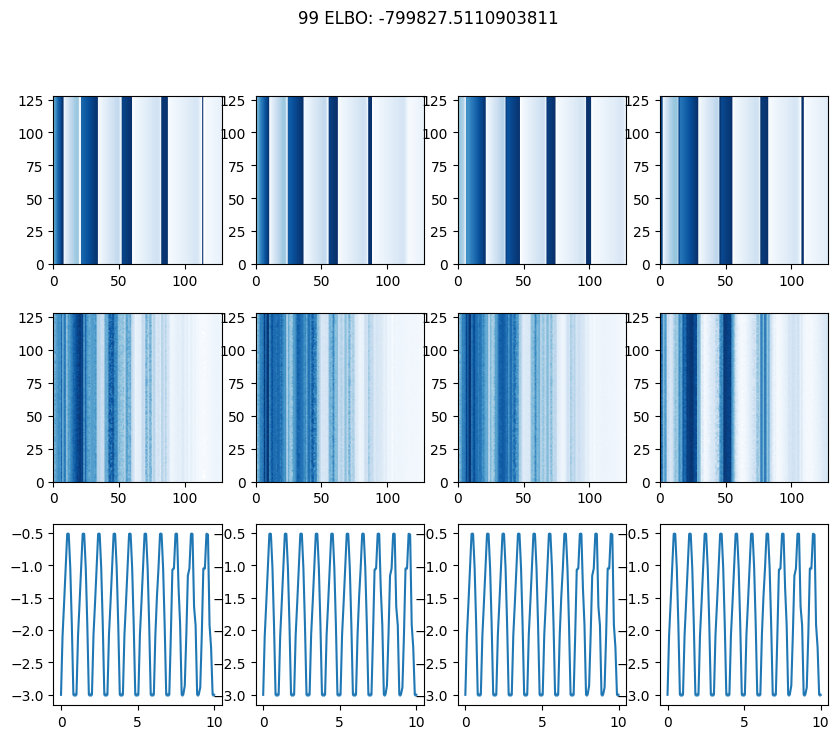

Frequency None 
Damping None


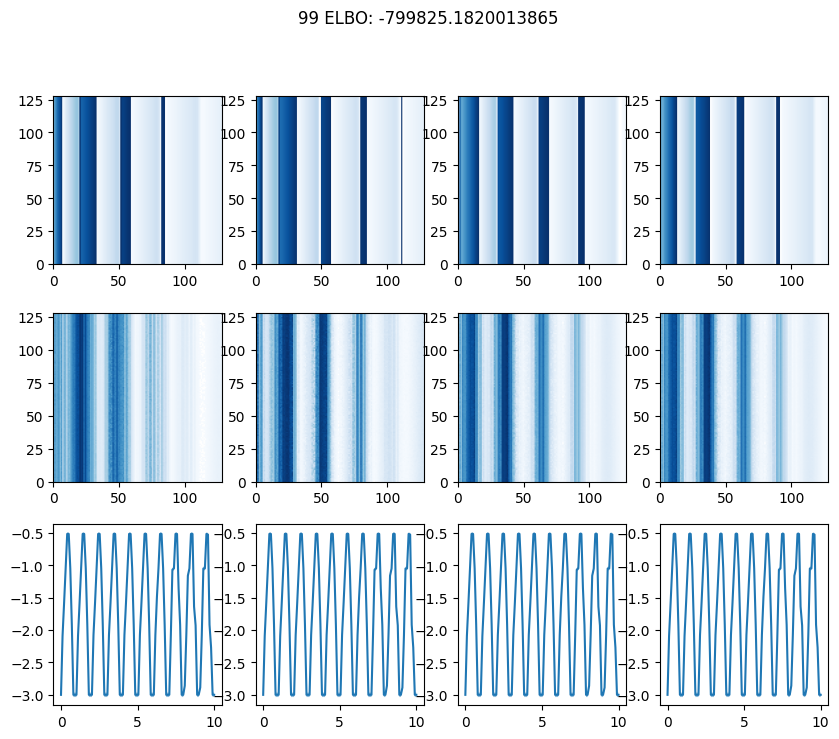

Frequency None 
Damping None


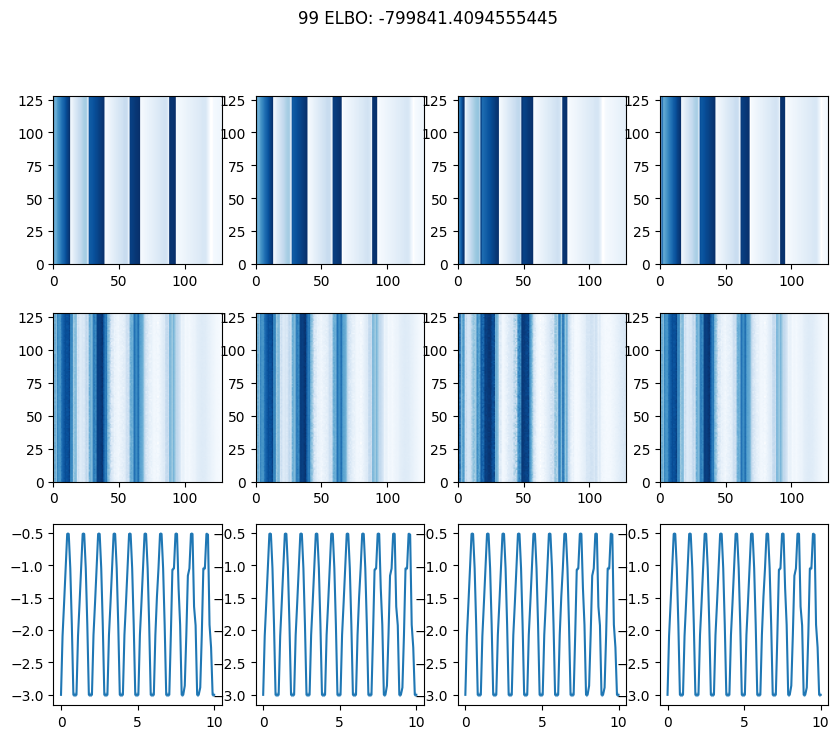

Frequency None 
Damping None


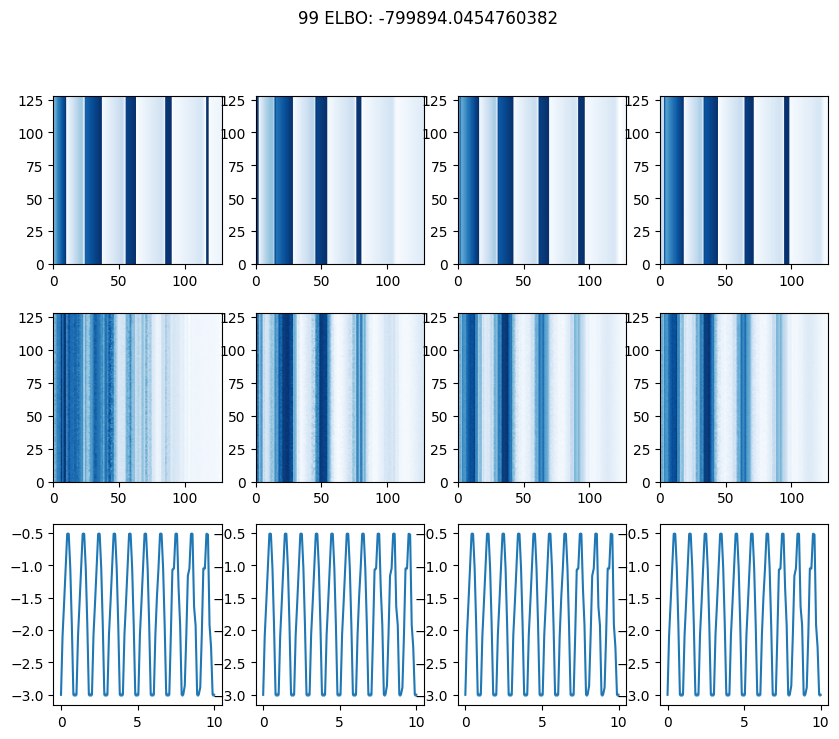

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


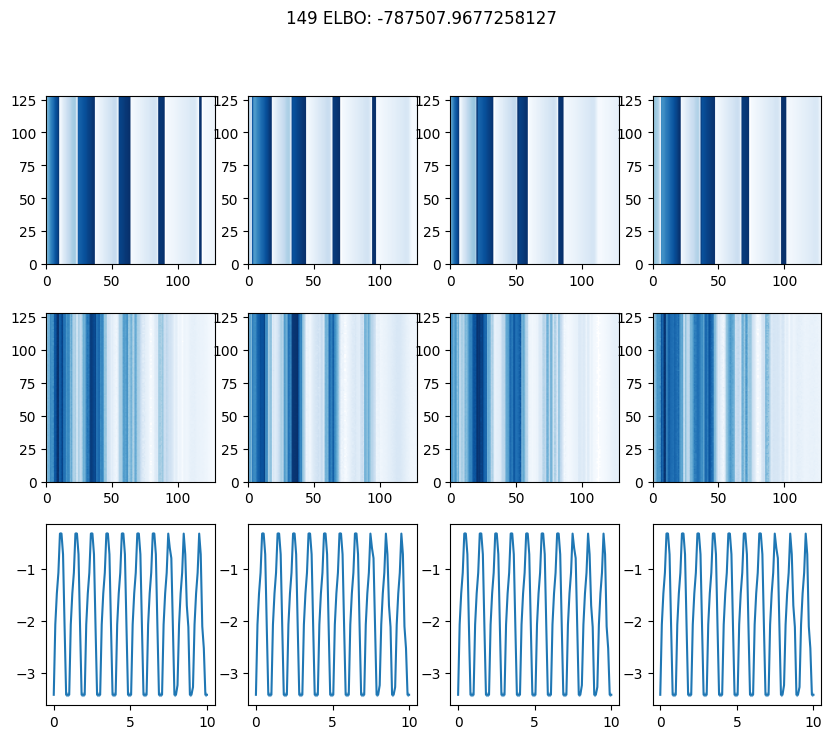

Frequency None 
Damping None


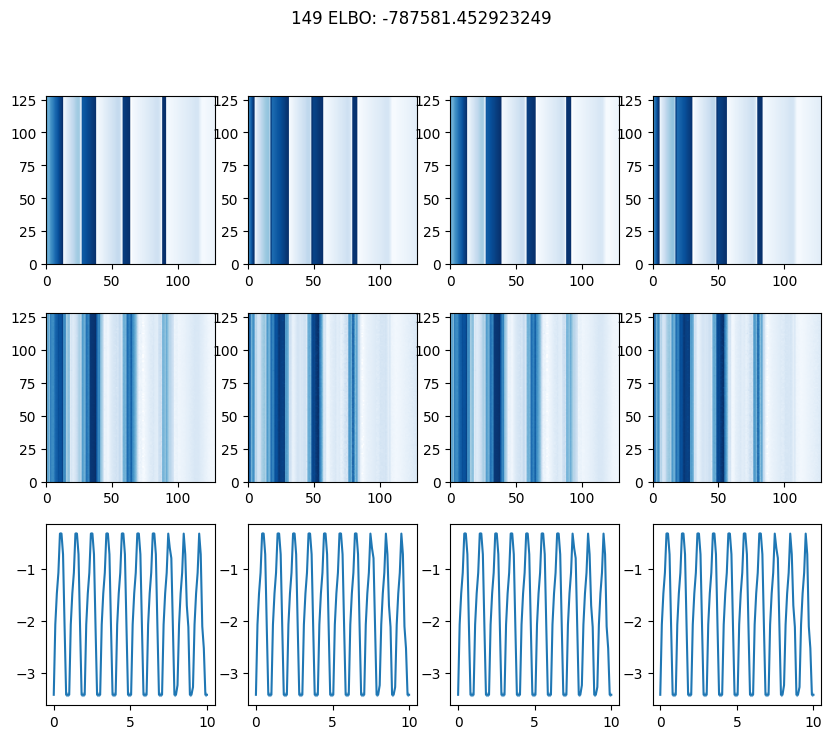

Frequency None 
Damping None


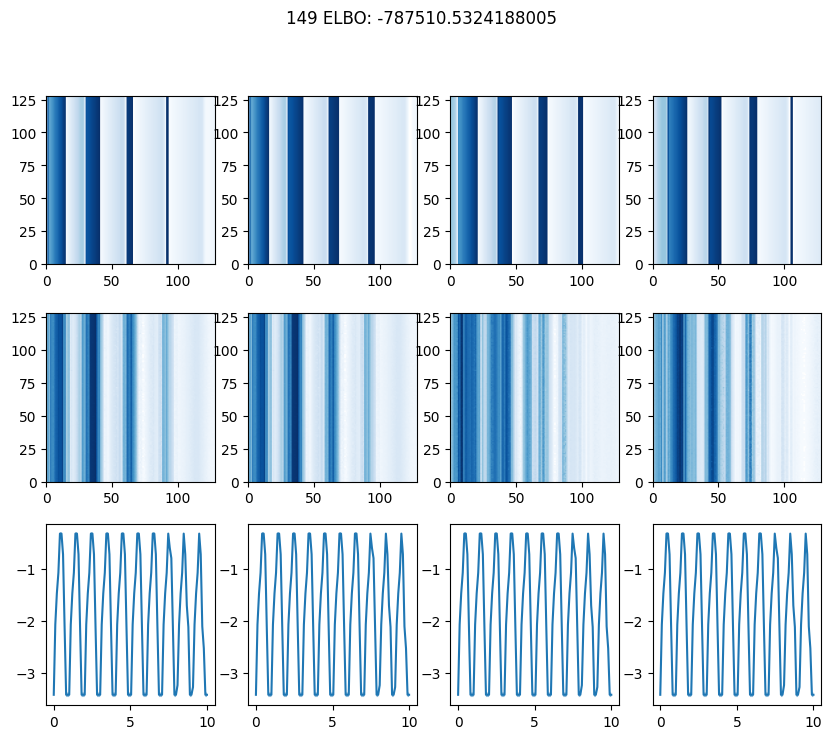

Frequency None 
Damping None


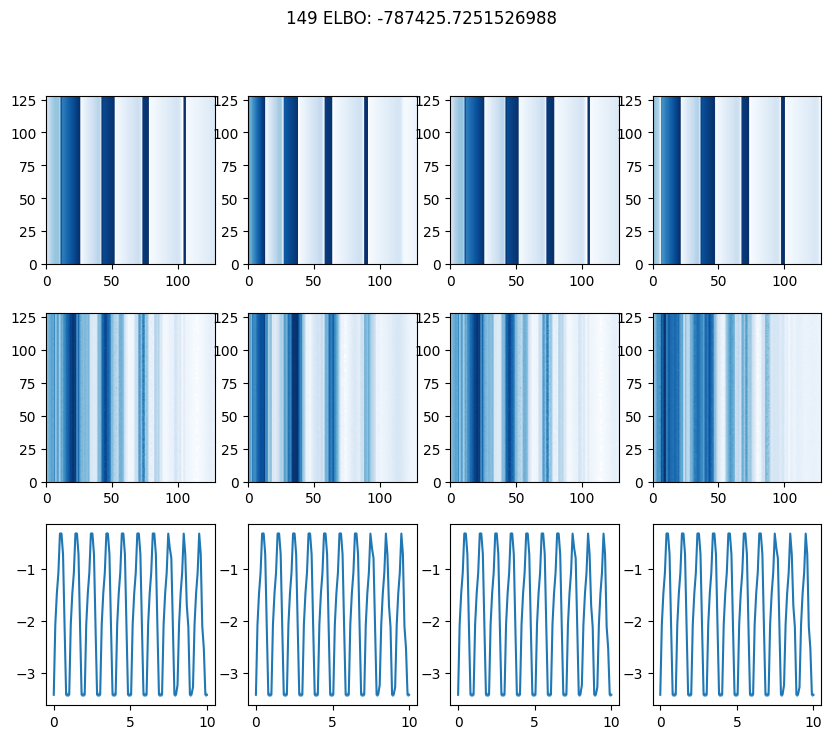

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


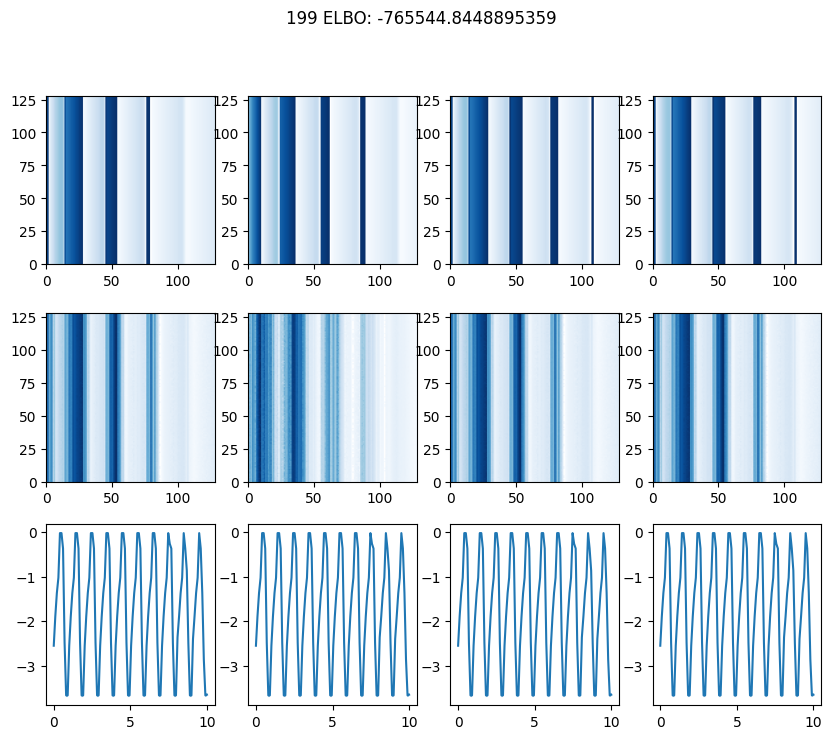

Frequency None 
Damping None


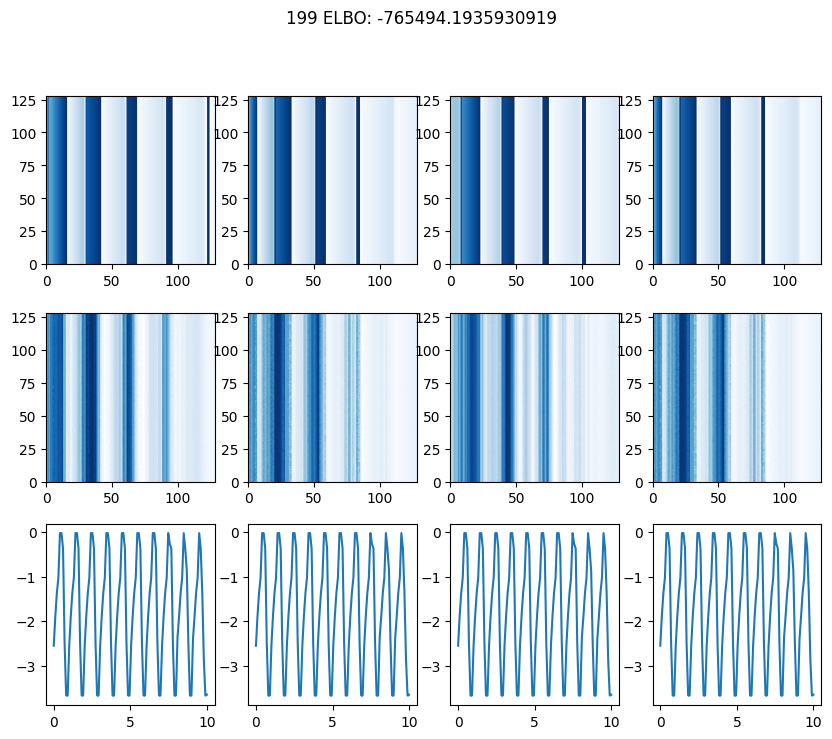

Frequency None 
Damping None


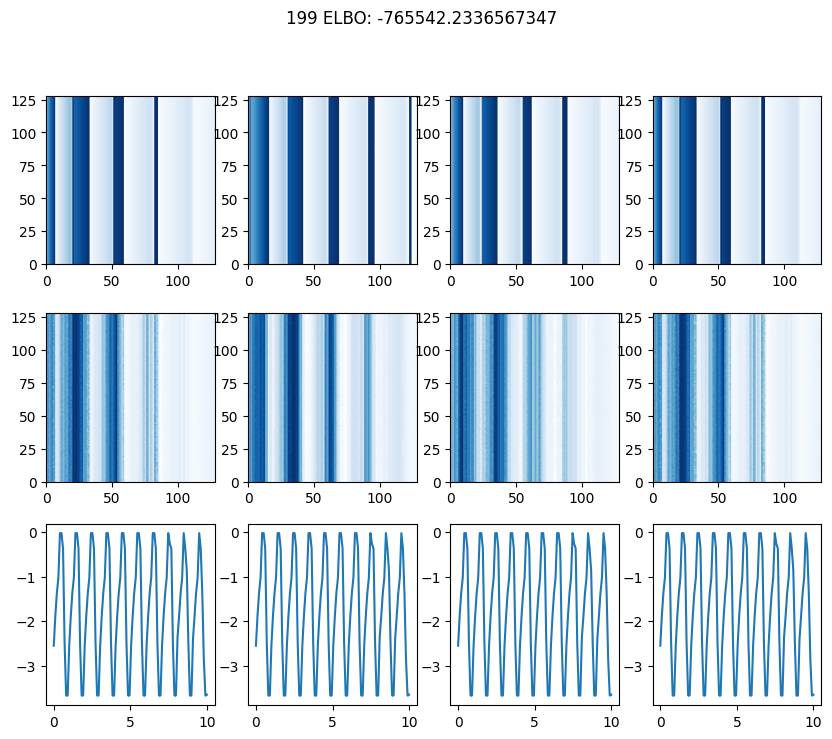

Frequency None 
Damping None


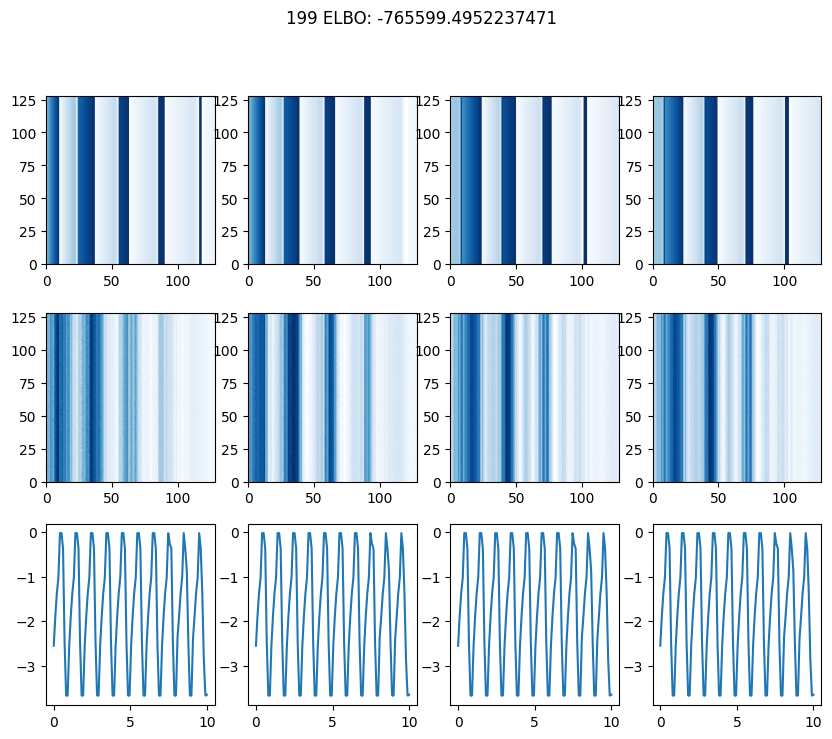

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


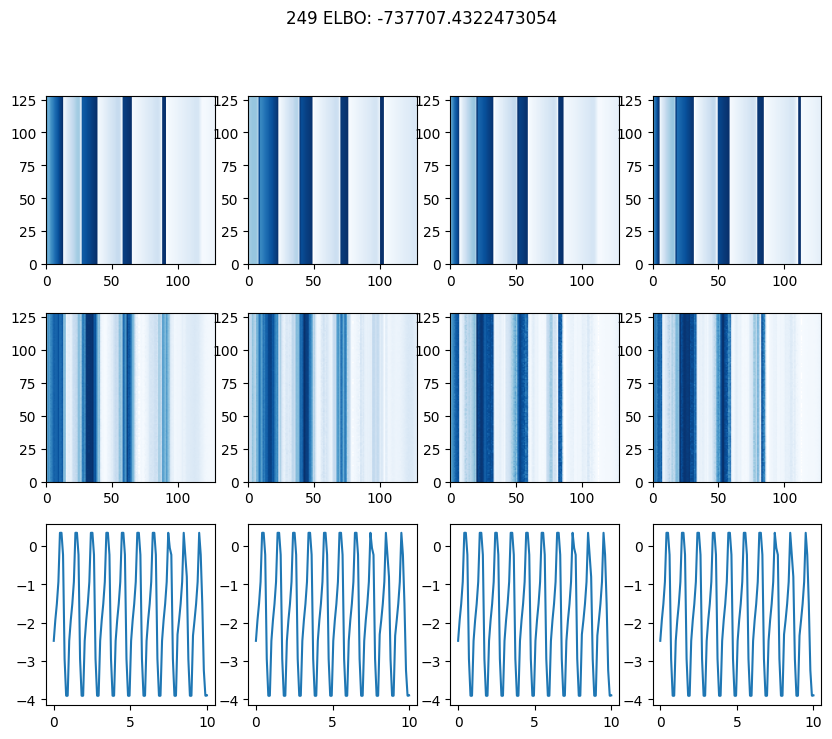

Frequency None 
Damping None


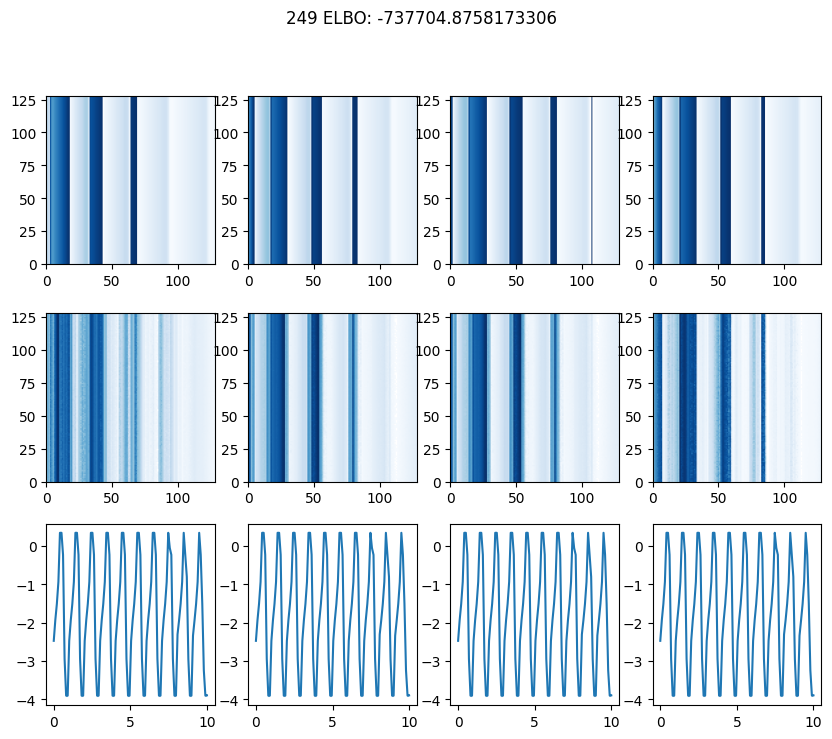

Frequency None 
Damping None


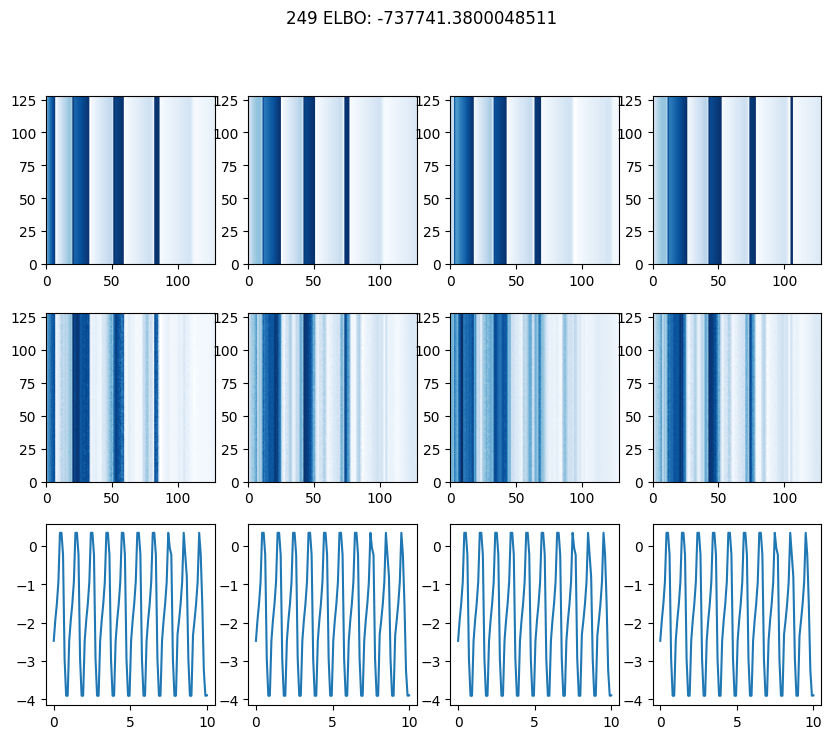

Frequency None 
Damping None


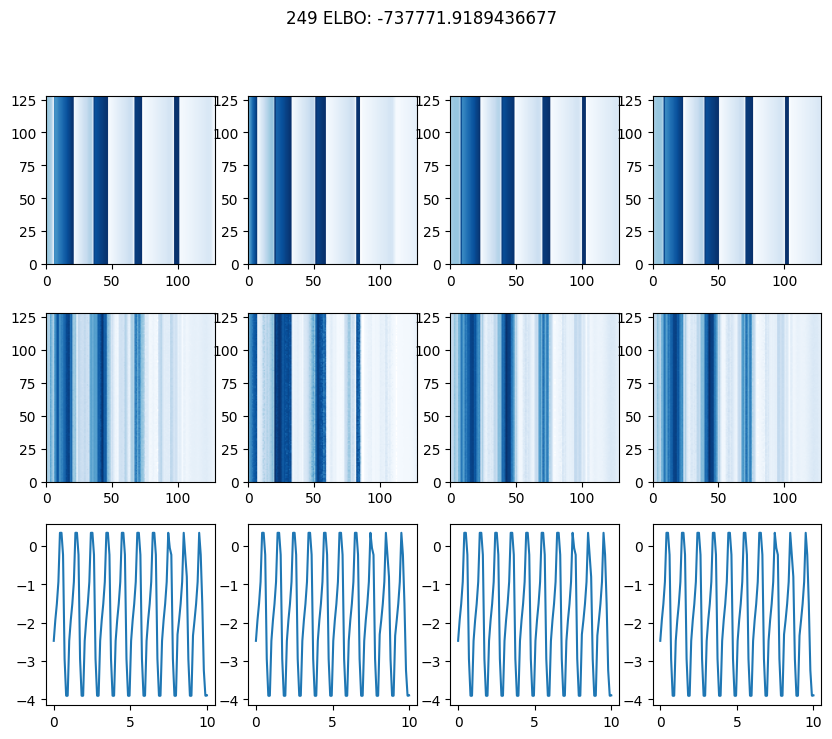

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


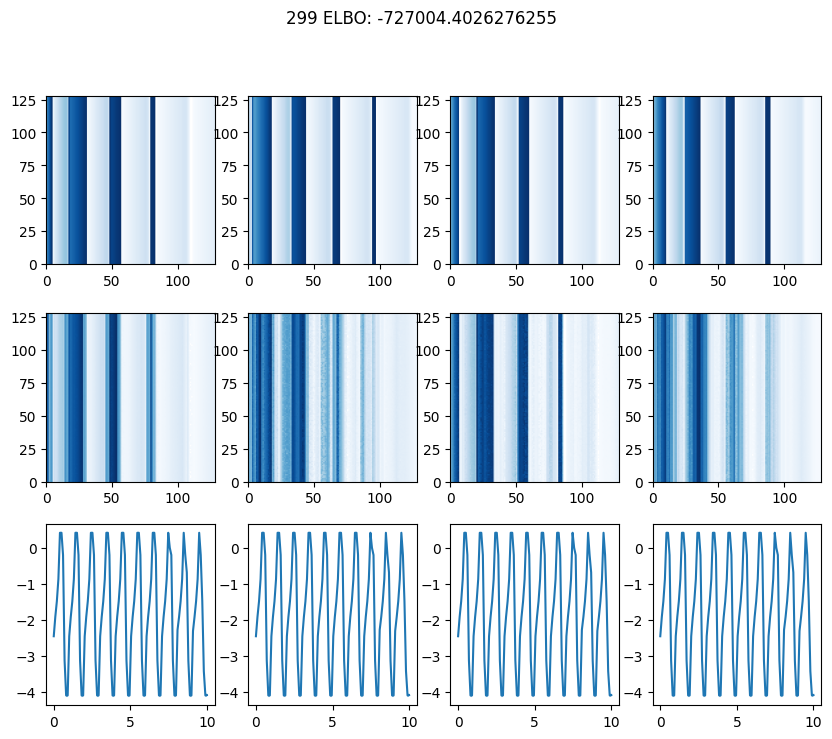

Frequency None 
Damping None


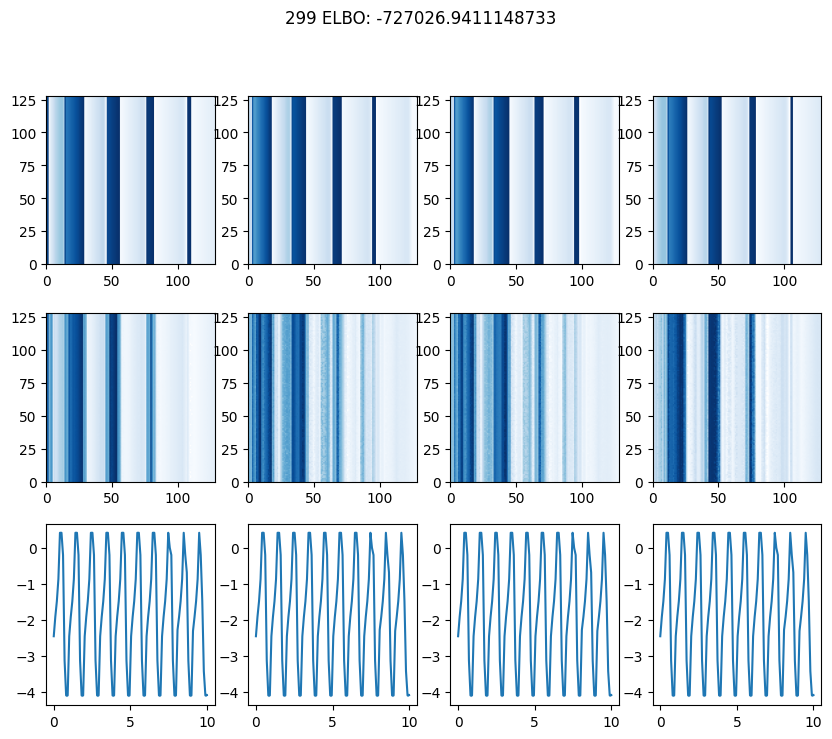

Frequency None 
Damping None


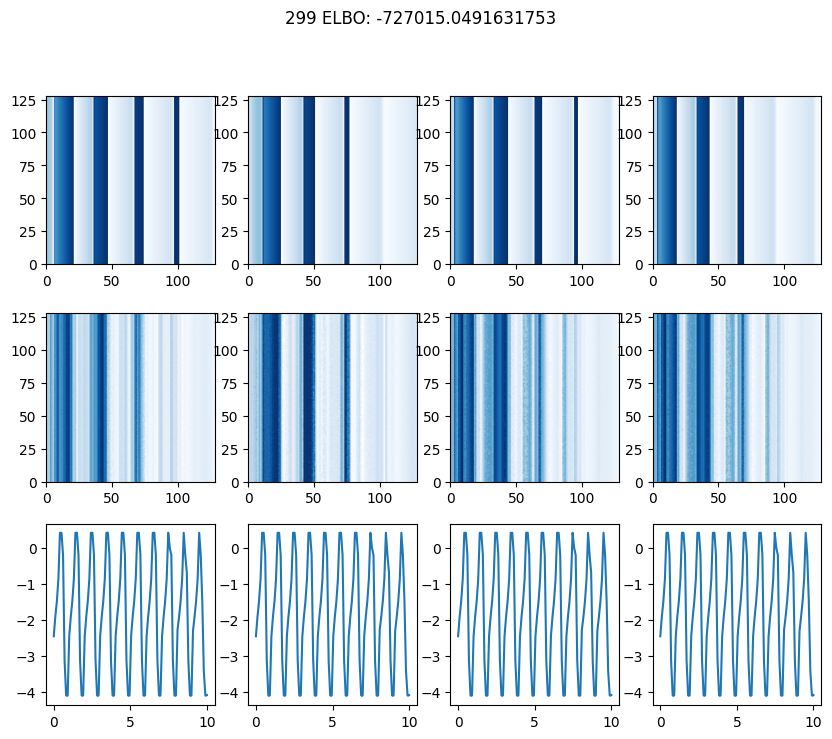

Frequency None 
Damping None


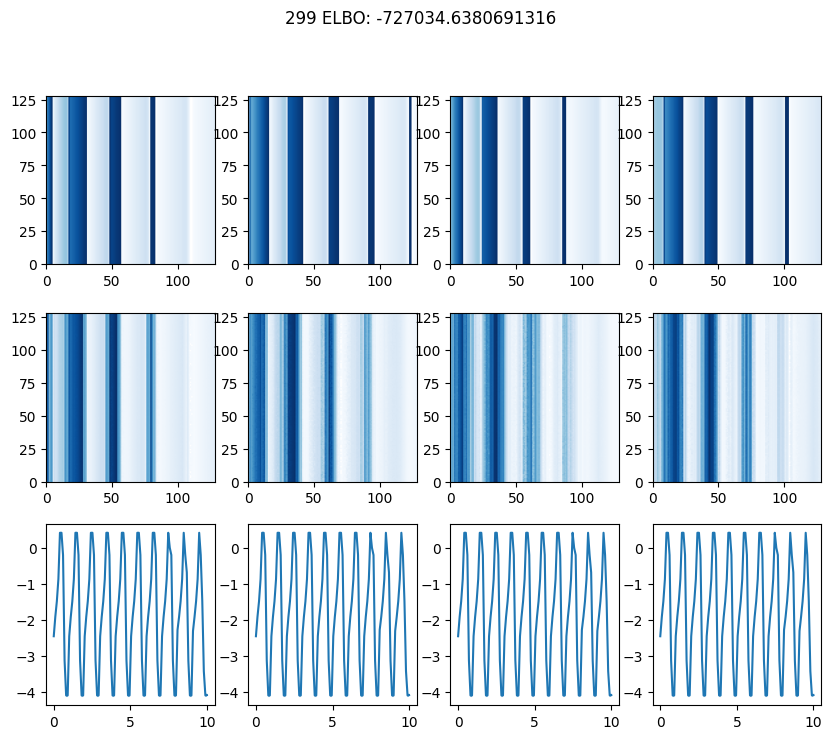

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


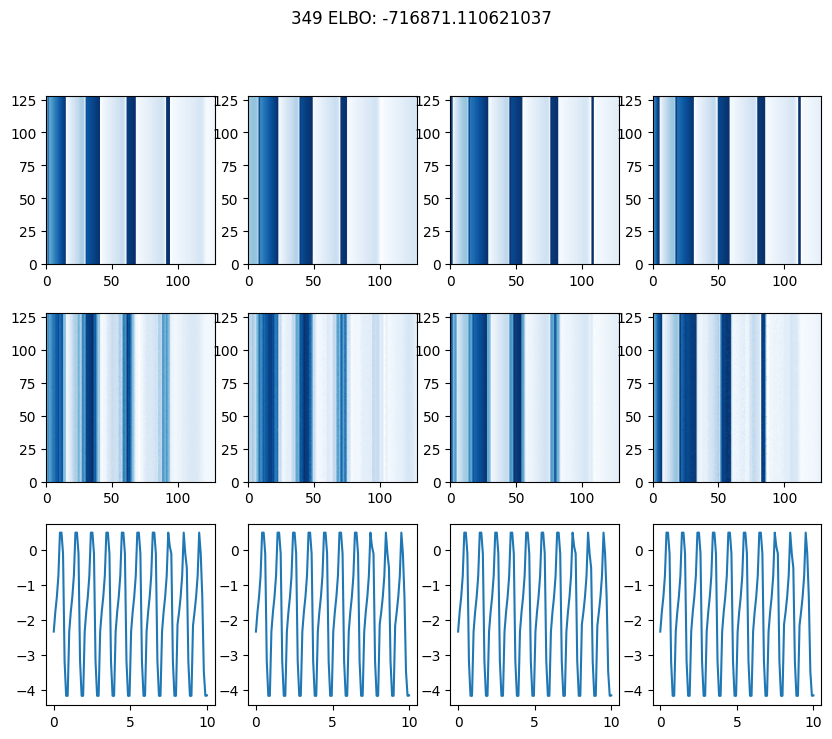

Frequency None 
Damping None


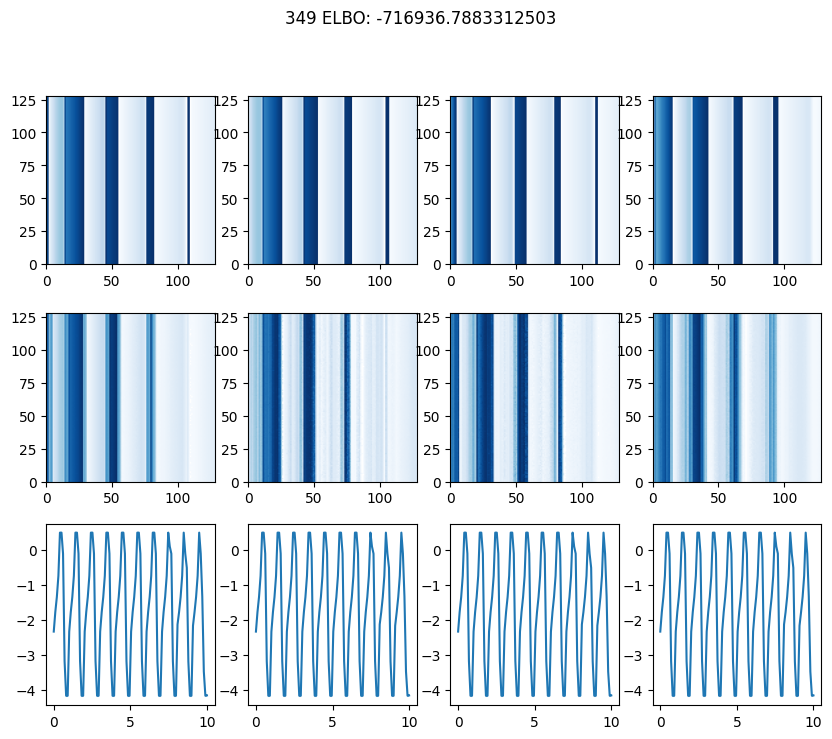

Frequency None 
Damping None


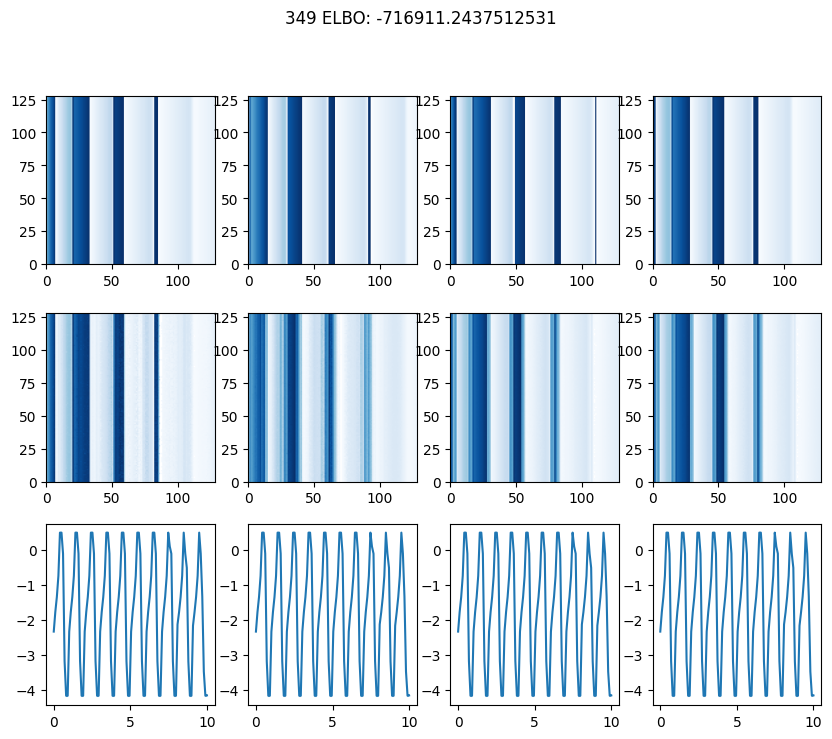

Frequency None 
Damping None


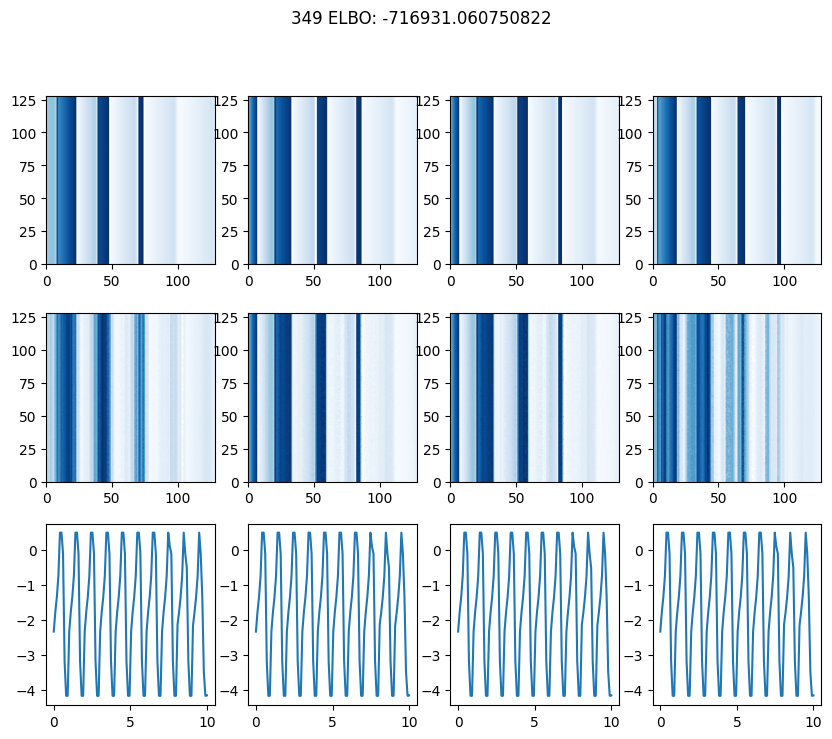

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


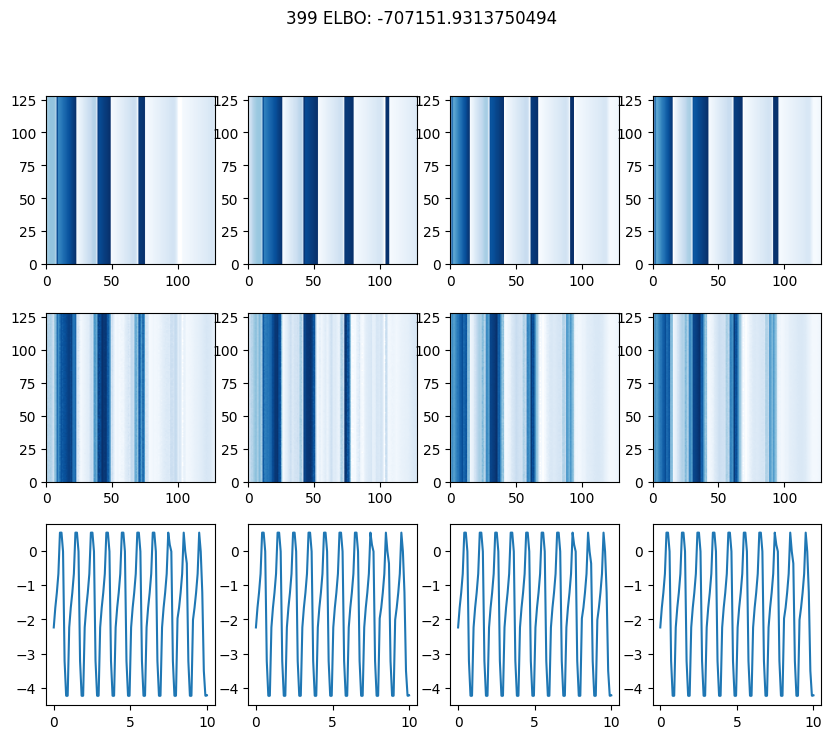

Frequency None 
Damping None


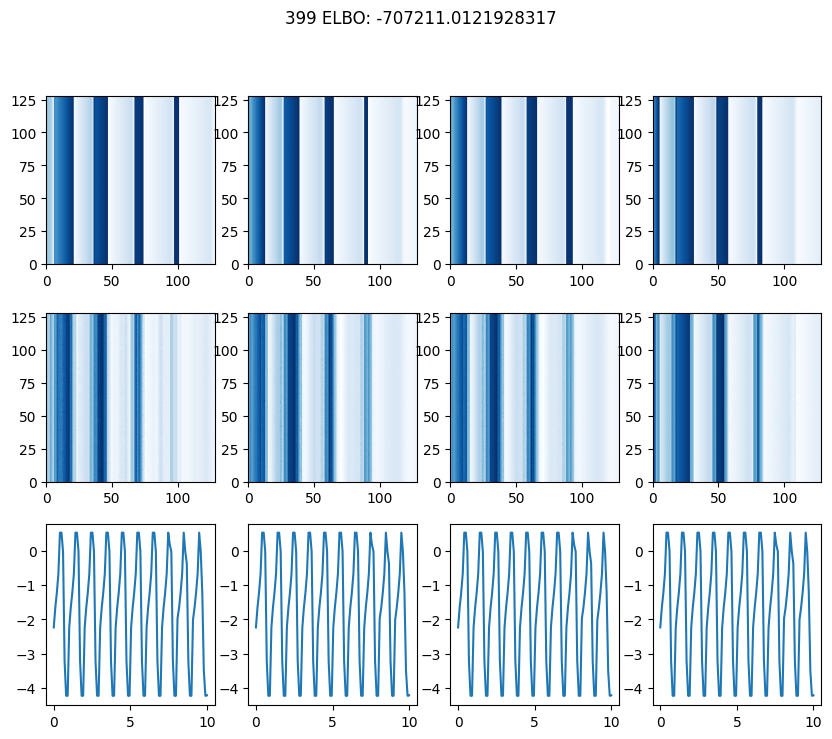

Frequency None 
Damping None


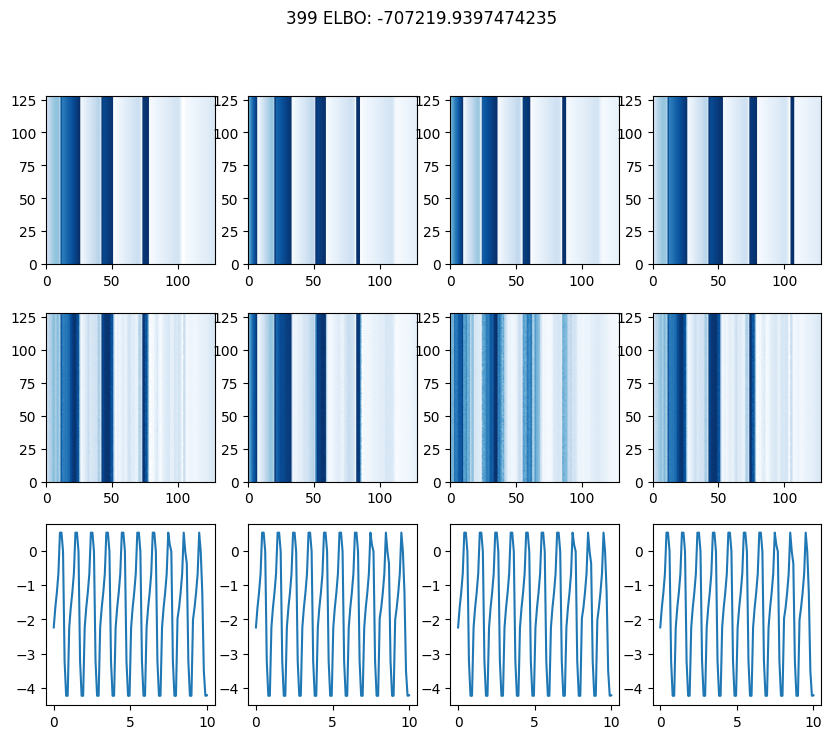

Frequency None 
Damping None


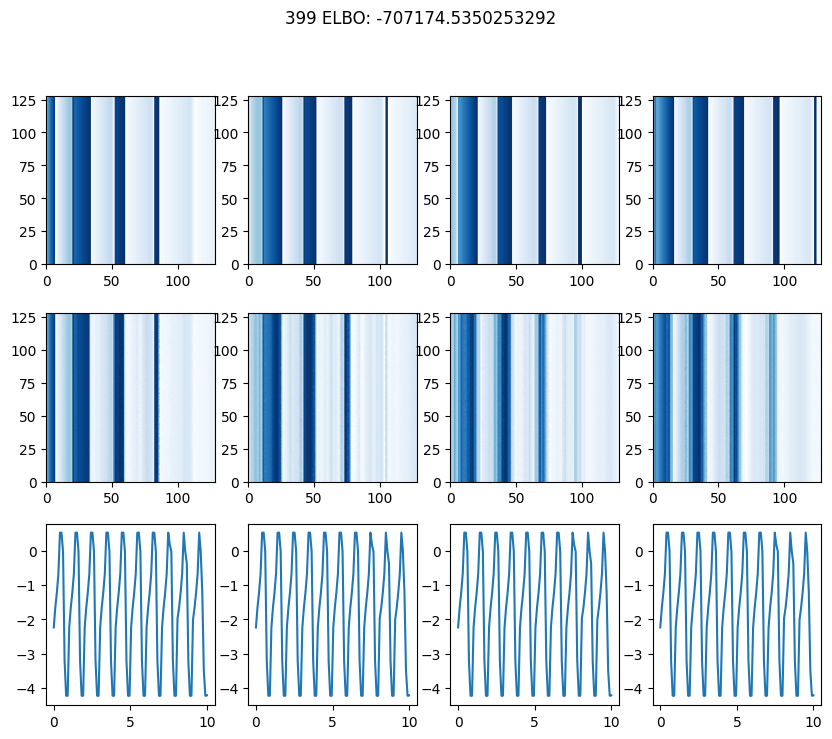

Validation: |          | 0/? [00:00<?, ?it/s]

Frequency None 
Damping None


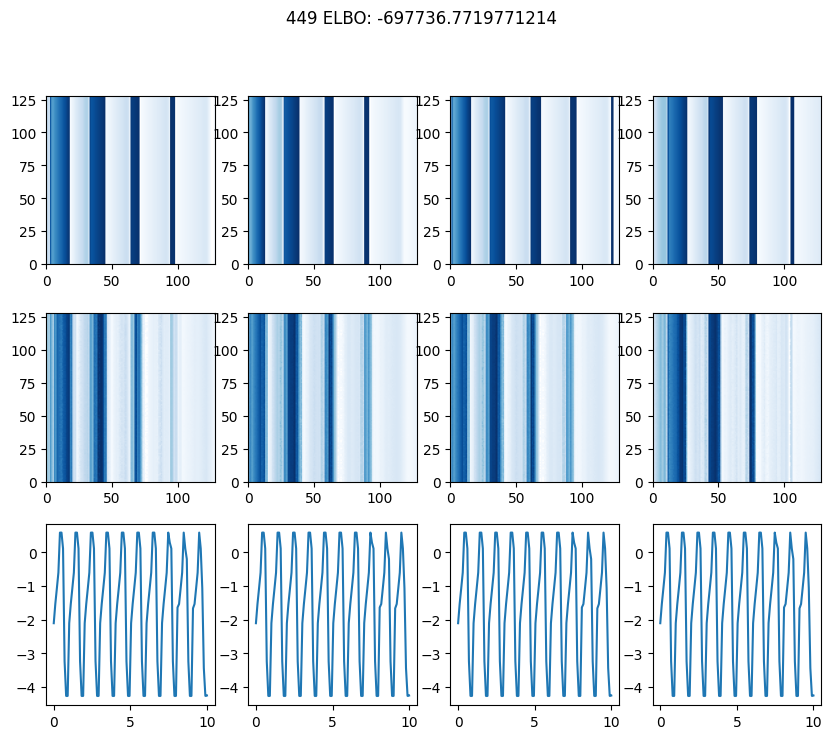

Frequency None 
Damping None


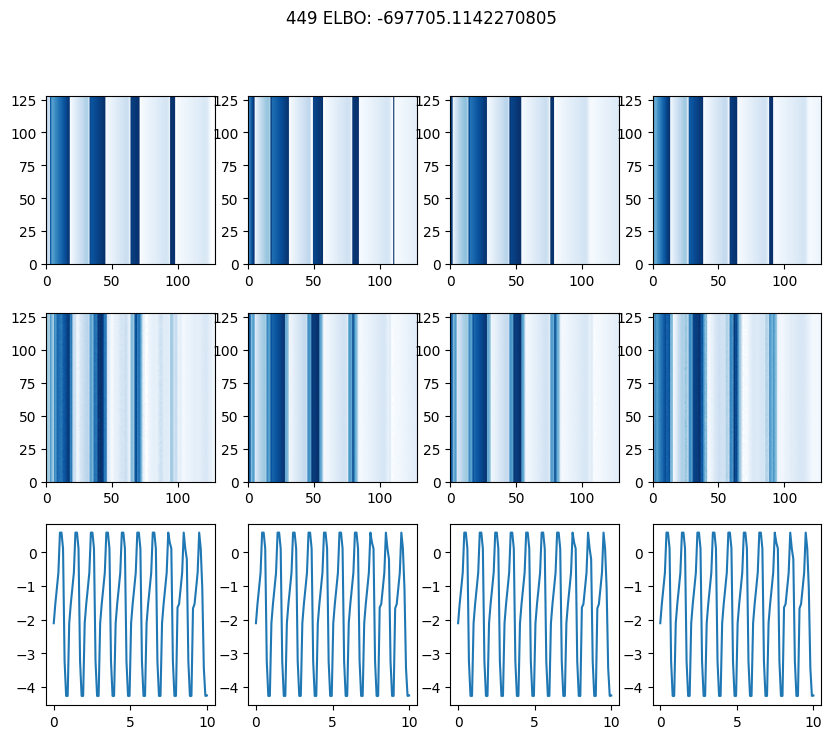

Frequency None 
Damping None


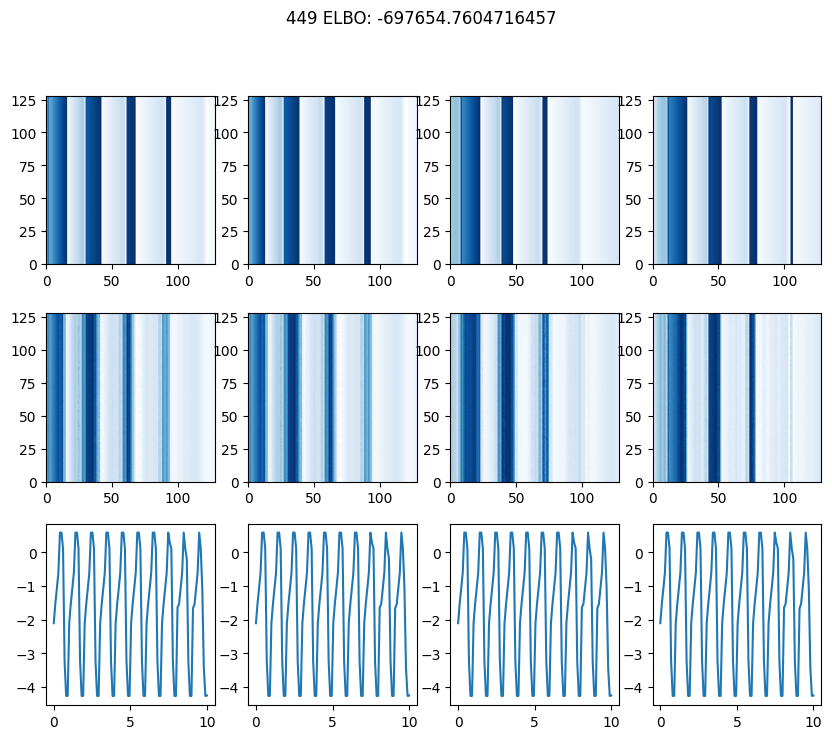

Frequency None 
Damping None


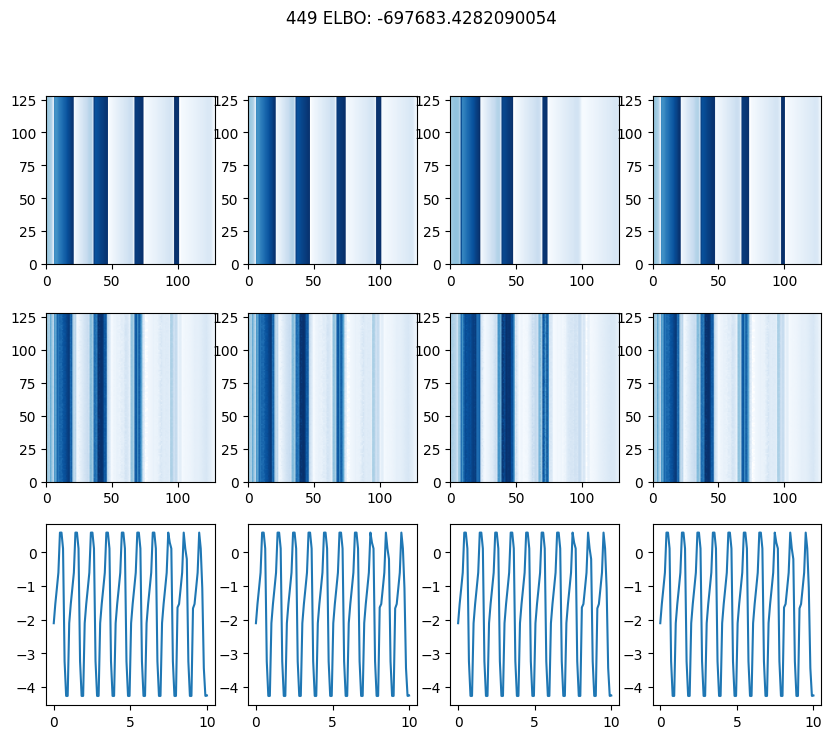


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [8]:
model = ShallowWaterVAEModel(encoder, decoder, dt, beta_annealing_epochs)
trainer = L.Trainer(max_epochs=max_epochs, callbacks=[ShallowWaterPEGPVAEPlotting(dt)], check_val_every_n_epoch=val_check, logger=wandb_logger)
trainer.fit(model, datamodule=data_module)